# Gold Price Prediction

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Task 1: Initial Data Exploration

In [5]:
gold_data = pd.read_csv("gold_price.csv")

In [6]:
gold_data.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [8]:
gold_data.isnull().sum()

Date          0
USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

In [9]:
gold_data.dropna(inplace=True)

In [10]:
gold_data.isnull().sum()

Date         0
USD (AM)     0
USD (PM)     0
GBP (AM)     0
GBP (PM)     0
EURO (AM)    0
EURO (PM)    0
dtype: int64

# Task 2: Create Train & Test Sets

In [12]:
x = gold_data.drop(['Date','GBP (AM)'],axis=1)
y = gold_data['GBP (AM)']

In [14]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size =0.2, random_state =2)

# Task 3: Develop Models & Predictions

In [16]:
regressor = RandomForestRegressor(n_estimators = 100)

In [18]:
regressor.fit(x_train , y_train)

RandomForestRegressor()

In [19]:
test_data_prediction = regressor.predict(x_test)

In [20]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9998309508578119


In [21]:
y_test = list(y_test)

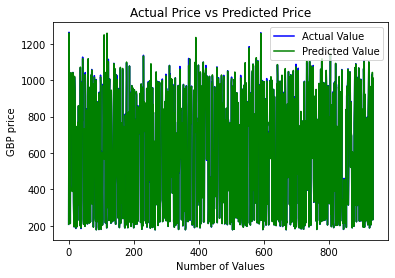

In [22]:
plt.plot(y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color= 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GBP price')
plt.legend()
plt.show()